In [1]:
# !git clone https://github.com/NSCC-COGS/GDAA2030.git

Cloning into 'GDAA2030'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 328 (delta 50), reused 19 (delta 7), pack-reused 214
Receiving objects: 100% (328/328), 19.14 MiB | 35.82 MiB/s, done.
Resolving deltas: 100% (129/129), done.


In [2]:
%cd /content/GDAA2030/tutorial2/moniqueruhl/



/content/GDAA2030/tutorial2/moniqueruhl


In [0]:
%%capture
%run GDAA_T2_moniqueruhl_getLandsat.ipynb

In [5]:
print (selectedScene)

productId                   LC08_L1TP_051012_20200404_20200405_01_RT
entityId                                       LC80510122020095LGN00
acquisitionDate                           2020-04-04 19:20:15.087373
cloudCover                                                      1.38
processingLevel                                                 L1TP
path                                                              51
row                                                               12
min_lat                                                      67.0866
min_lon                                                     -119.176
max_lat                                                        69.41
max_lon                                                     -113.115
download_url       https://s3-us-west-2.amazonaws.com/landsat-pds...
lat                                                          68.2483
lon                                                         -116.146
dist                              

In [0]:
from matplotlib import pyplot as plt
import tifffile
import numpy as np

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
def ourPlot(a, interpolation = 'bilinear', histogram=True):
  stats = {
      'max' : np.nanmax(a),
      'min' : np.nanmin(a),
      'mean' : np.nanmean(a),
      'std' : np.nanstd(a),
      'bitDepth' : a.dtype,
      'dimensions' : a.shape,
      'top_left_value' : a[0,0]
  }

  for item in stats:
    print('%s: %s'%(item, stats[item]))

  plt.cla()
  plt.subplot(121)
  plt.imshow(a ,interpolation = interpolation)
  if histogram:
    plt.subplot(122)
    plt.hist(a.flatten(),bins=100)
    s0 = stats['mean'] - stats['std']
    s1 = stats['mean'] + stats['std']
    plt.axvline(s0,c='red')
    plt.axvline(s1,c='red')

max: 44415
min: 0
mean: 13141.258291917766
std: 11279.268521273303
bitDepth: uint16
dimensions: (8511, 8471)
top_left_value: 0


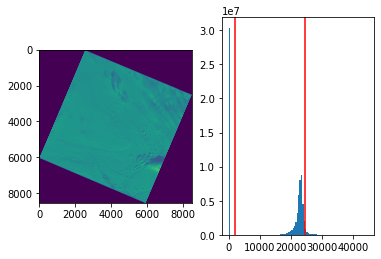

In [9]:
imageFullSize = tifffile.imread(imagePath)
ourPlot(imageFullSize)

max: 43994
min: 0
mean: 13113.80757125299
std: 11283.75357003471
bitDepth: uint16
dimensions: (852, 848)
top_left_value: 0


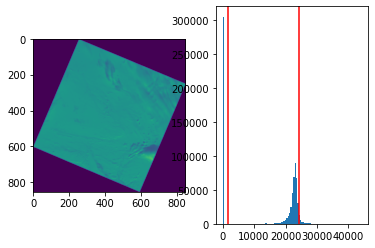

In [10]:
image = imageFullSize[::10,::10]

ourPlot(image)

max: True
min: False
mean: 0.42255043626539107
std: 0.49396514560980803
bitDepth: bool
dimensions: (852, 848)
top_left_value: True


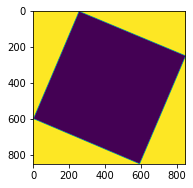

In [11]:
mask = image == 0
ourPlot(mask, histogram=False)

max: 1
min: 0
mean: 0.42255043626539107
std: 0.49396514560980803
bitDepth: int32
dimensions: (852, 848)
top_left_value: 1


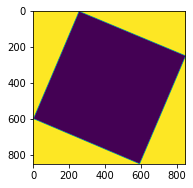

In [12]:
from scipy.ndimage import label
labelMask,unused = label(mask)
ourPlot(labelMask, histogram=False)

In [13]:
print(image.mean())
print(image[~mask].mean()) #~ character works to 'flip' the mask so that true becomes false and vice versa

13113.80757125299
22709.87527714193


max: True
min: False
mean: 0.34290985694038445
std: 0.4746816690725582
bitDepth: bool
dimensions: (852, 848)
top_left_value: False


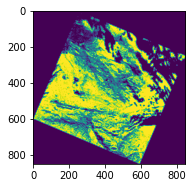

In [14]:
thresholdImage = image > image[~mask].mean() #where image is greater than the mean of the unmasked image
ourPlot(thresholdImage, histogram=False)

max: True
min: False
mean: 0.34290985694038445
std: 0.4746816690725582
bitDepth: bool
dimensions: (852, 848)
top_left_value: False


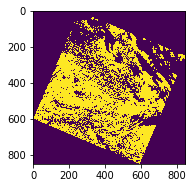

In [15]:
ourPlot(thresholdImage, interpolation = 'nearest', histogram=False)

max: 7183
min: 0
mean: 592.6932162946231
std: 1397.0710306999815
bitDepth: int32
dimensions: (852, 848)
top_left_value: 0


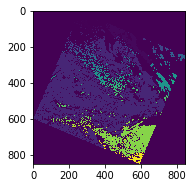

In [16]:
labelThreshold,unused = label(thresholdImage)
ourPlot(labelThreshold, interpolation = 'nearest', histogram=False)

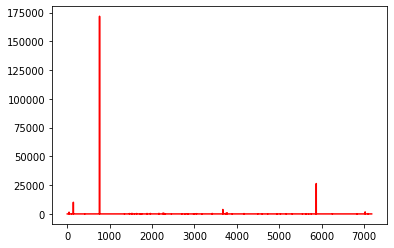

In [17]:
labels, pixelCount = np.unique(labelThreshold[labelThreshold!=0], return_counts=True)
plt.plot(labels, pixelCount, c='red')

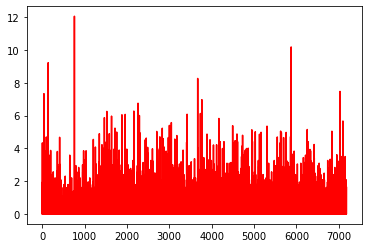

In [18]:
plt.plot(labels, np.log(pixelCount), c='red')

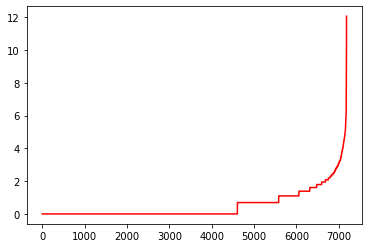

In [19]:
pixelCountorted = np.sort(pixelCount)
plt.plot(np.log(pixelCountorted), c='red')

Label: 762
max: True
min: False
mean: 0.23776048587120205
std: 0.4257116832193966
bitDepth: bool
dimensions: (852, 848)
top_left_value: False


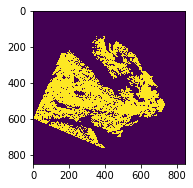

In [20]:
sorter = np.argsort(pixelCount)
largestLabel = labels[sorter][-1] #-1 grabs last value in array, here it will be the label with the largest pixelCount
print('Label:',largestLabel)

largestArea = (labelThreshold == largestLabel)
ourPlot((largestArea), interpolation='nearest', histogram=False)

Label: 5876
max: True
min: False
mean: 0.036534458322260606
std: 0.1876158087085403
bitDepth: bool
dimensions: (852, 848)
top_left_value: False


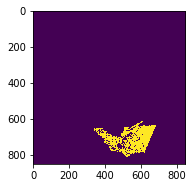

In [21]:
secondLargestLabel = labels[sorter][-2] #grab label for second largest pixelCount
print('Label:', secondLargestLabel)
secondLargestArea = (labelThreshold == secondLargestLabel)
ourPlot((secondLargestArea), interpolation='nearest', histogram=False)

max: True
min: False
mean: 0.008106619275400833
std: 0.0896710767155415
bitDepth: bool
dimensions: (852, 848)
top_left_value: False


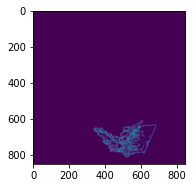

In [22]:
from skimage.morphology import dilation
seconLargestPerm = ~secondLargestArea & dilation(secondLargestArea) #IS NOT the mask area x IS the dilated mask area
ourPlot(seconLargestPerm, interpolation='bilinear', histogram=False) 

max: 43994.0
min: 10318.0
mean: 22709.873
std: 1602.0759
bitDepth: float32
dimensions: (852, 848)
top_left_value: nan


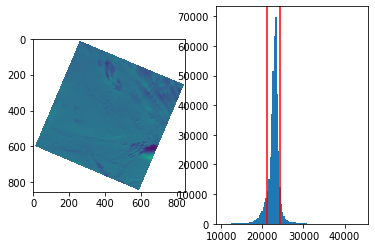

In [23]:
image32 = image.astype(np.float32)
image32[mask] = np.nan
ourPlot(image32)

max: 43994.0
min: 22710.0
mean: 23511.496
std: 774.4916
bitDepth: float32
dimensions: (852, 848)
top_left_value: nan


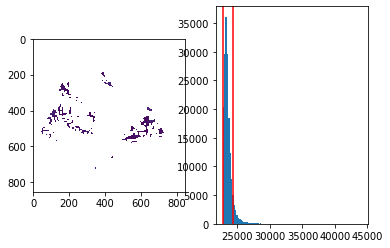

In [24]:
image32LargestArea = image32.copy()
image32LargestArea[~largestArea] = np.nan # anything NOT in the largest area is set to 'not a number'
ourPlot(image32LargestArea)

In [0]:
def stdScale(a, n=1, inplace=False):
  if inplace:
    b=a
  else:
    b=a.copy()
  s0 = np.nanmean(b) - np.nanstd(b)/n
  s1 = np.nanmean(b) + np.nanstd(b)/n
  print('Scale from %f to %f' %(s0,s1))
  b[b<s0] = s1 # where the arrays is LESS than the mean - std, SET it to the mean - std
  b[b>s1] = s1# where the arrays is GREATER than the mean + std, SET it to the mean + std
  return b

Scale from 21107.797119 to 24311.948975
max: 24311.95
min: 21108.0
mean: 23141.38
std: 824.41583
bitDepth: float32
dimensions: (852, 848)
top_left_value: nan


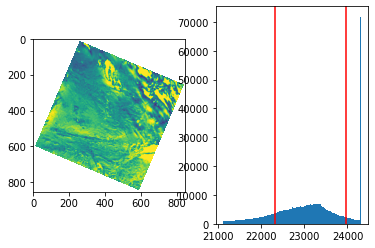

In [26]:
image32_scaled = stdScale(image32)
ourPlot(image32_scaled)

Scale from 22737.004517 to 24285.987671
max: 24285.988
min: 22738.0
mean: 23446.35
std: 443.6673
bitDepth: float32
dimensions: (852, 848)
top_left_value: nan


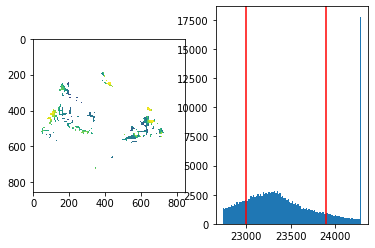

In [27]:
image32LargestArea_scaled = stdScale(image32LargestArea)
ourPlot(image32LargestArea_scaled)

In [0]:
def convert32(a, maskVal=0, inplace=False):
  if inplace:
    b=a
  else:
    b=a.copy()
  mask = b == maskVal
  b = b.astype(np.float32)
  b[mask] = np.nan
  return b

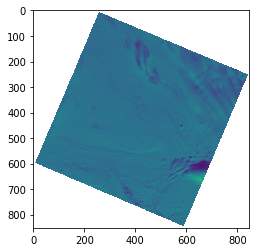

In [29]:
from skimage.feature import peak_local_max

localMaxPts = peak_local_max(image32, min_distance=20) # our image as 32 bit
plt.imshow(image32)
plt.scatter(localMaxPts[:, 1], localMaxPts[:, 0],c='red')

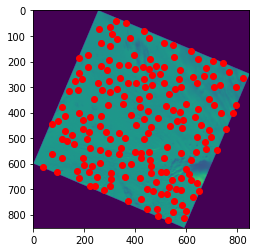

In [30]:
localMaxPts = peak_local_max(image, min_distance=20) # our origninal image in 16bit integer
plt.imshow(image) 
plt.scatter(localMaxPts[:, 1], localMaxPts[:, 0],c='red')

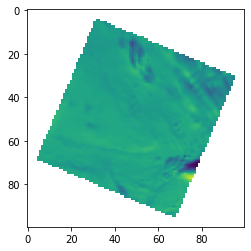

In [32]:
import skimage
image32Resamp = skimage.transform.resize(image32, output_shape = [100,100]) # our image as 32 bit
plt.imshow(image32Resamp)

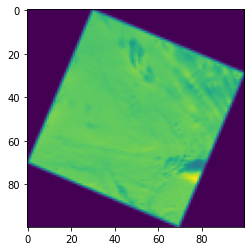

In [33]:
imageResamp = skimage.transform.resize(image, output_shape = [100,100]) # original image in 16bit integer
plt.imshow(imageResamp)

In [0]:
def normalize(a, inplace=False):
  if inplace:
    b=a
  else:
    b=a.copy()

  if b.dtype != np.float32:
    b = b.astype(np.float32)

  b -= np.nanmin(b)
  b /= np.nanmax(b)
  # print(np.nanmin(b), np.nanmax(b))

  return b

max: 1.0
min: 0.0
mean: 0.6346487
std: 0.2573124
bitDepth: float32
dimensions: (852, 848)
top_left_value: nan


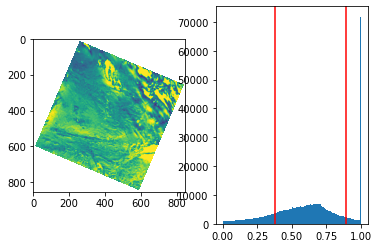

In [35]:
image32_scaled_norm = normalize(image32_scaled)
ourPlot(image32_scaled_norm)

In [0]:
def scale8bit(a, return_mask=True, inplace=False):
  if inplace:
    b=a
  else:
    b=a.copy()

  if return_mask:
    mask = ~np.isnan(b)
  b *= 255
  b = b.astype(np.uint8)

  if return_mask:
    mask = mask.astype(np.uint8)
    mask *= 255

    return b,mask

  else:
    return b

max: 255
min: 0
mean: 93.21188629418018
std: 94.09046164751187
bitDepth: uint8
dimensions: (852, 848)
top_left_value: 0


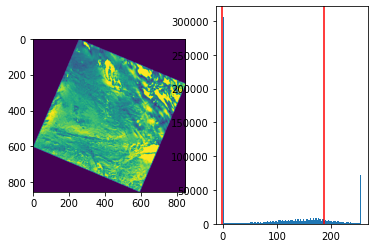

In [37]:
image8Bit,mask8Bit = scale8bit(image32_scaled_norm)
ourPlot(image8Bit)

max: 255
min: 0
mean: 147.24963875232527
std: 125.96111213050104
bitDepth: uint8
dimensions: (852, 848)
top_left_value: 0


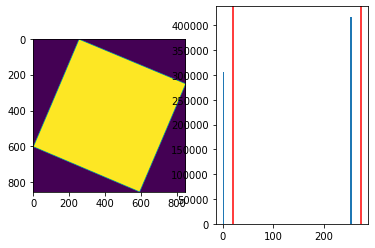

In [39]:
ourPlot(mask8Bit)

In [0]:
def makeComposite(bands=[4,3,2]):
  images = []
  for band in bands:
    imageUrl, imagePath = glf.getImageID(selectedScene, band, imageDir)
    glf.downloadImage(imageUrl,imagePath)
    im = tifffile.imread(imagePath)[::10,::10] #reduce the resolution of the images by a factor of 10 
    images.append(im)
    
  return np.dstack(images)

https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/051/012/LC08_L1TP_051012_20200404_20200405_01_RT/LC08_L1TP_051012_20200404_20200405_01_RT_B4.TIF
.\images/LC08_L1TP_051012_20200404_20200405_01_RT_B4.TIF
downloading... https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/051/012/LC08_L1TP_051012_20200404_20200405_01_RT/LC08_L1TP_051012_20200404_20200405_01_RT_B4.TIF
https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/051/012/LC08_L1TP_051012_20200404_20200405_01_RT/LC08_L1TP_051012_20200404_20200405_01_RT_B3.TIF
.\images/LC08_L1TP_051012_20200404_20200405_01_RT_B3.TIF
.\images/LC08_L1TP_051012_20200404_20200405_01_RT_B3.TIF already found
https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/051/012/LC08_L1TP_051012_20200404_20200405_01_RT/LC08_L1TP_051012_20200404_20200405_01_RT_B2.TIF
.\images/LC08_L1TP_051012_20200404_20200405_01_RT_B2.TIF
downloading... https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/051/012/LC08_L1TP_051012_20200404_20200405_01_RT/LC08_L1TP_051012_20200404_

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


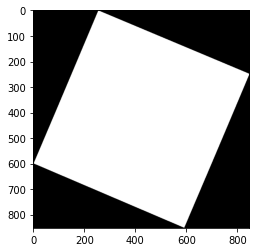

In [45]:
compositeImage = makeComposite([4,3,2])
plt.imshow(compositeImage)

In [0]:
def makeCompositeRGBA(bands=[4,3,2]):
  images = []
  for band in bands:
    imageUrl, imagePath = glf.getImageID(selectedScene, band, imageDir)
    glf.downloadImage(imageUrl,imagePath)
    im = tifffile.imread(imagePath)[::10,::10] # this will reduce the size of the arrays by a factor of 10x10 to save on memory
    im = convert32(im, inplace=True)
    im = stdScale(im, n=.5, inplace=True) # note that I did play with the number of standard deviation here
    im = normalize(im, inplace=True)
    im,mask = scale8bit(im, return_mask=True, inplace=True)
    images.append(im)
  images.append(mask)

  return np.dstack(images)

https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/051/012/LC08_L1TP_051012_20200404_20200405_01_RT/LC08_L1TP_051012_20200404_20200405_01_RT_B4.TIF
.\images/LC08_L1TP_051012_20200404_20200405_01_RT_B4.TIF
.\images/LC08_L1TP_051012_20200404_20200405_01_RT_B4.TIF already found
Scale from 19871.891846 to 27366.592529
https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/051/012/LC08_L1TP_051012_20200404_20200405_01_RT/LC08_L1TP_051012_20200404_20200405_01_RT_B3.TIF
.\images/LC08_L1TP_051012_20200404_20200405_01_RT_B3.TIF
.\images/LC08_L1TP_051012_20200404_20200405_01_RT_B3.TIF already found
Scale from 19505.721191 to 25914.024902
https://s3-us-west-2.amazonaws.com/landsat-pds/c1/L8/051/012/LC08_L1TP_051012_20200404_20200405_01_RT/LC08_L1TP_051012_20200404_20200405_01_RT_B2.TIF
.\images/LC08_L1TP_051012_20200404_20200405_01_RT_B2.TIF
.\images/LC08_L1TP_051012_20200404_20200405_01_RT_B2.TIF already found
Scale from 22031.873535 to 28082.177246
max: 255
min: 0
mean: 96.48960098048985
std: 9

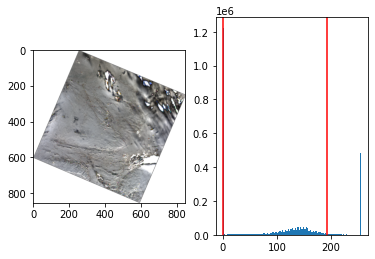

In [47]:
imageRGBA = makeCompositeRGBA([4,3,2])
ourPlot(imageRGBA)

max: 255
min: 0
mean: 147.24646226415095
std: 125.96161013598733
bitDepth: uint8
dimensions: (852, 848)
top_left_value: 0


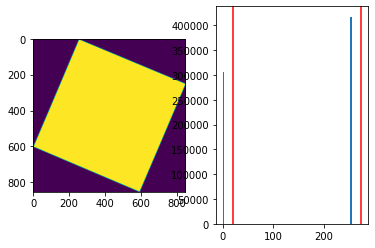

In [48]:
ourPlot(imageRGBA[:,:,3])

In [49]:
import folium
# folium.Map([45, -63], zoom_start=7, tiles='stamentoner')

m = folium.Map([selectedScene.lat, selectedScene.lon], zoom_start=7)

folium.raster_layers.ImageOverlay(
    image=imageRGBA,
    bounds=[[selectedScene.min_lat, selectedScene.min_lon], 
            [selectedScene.max_lat, selectedScene.max_lon]],).add_to(m)

m